In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import pprint


## Part 1: Getting the Data





In [2]:
#######################
import myauz
from myauz.myalpha_funcs import (
    read_data,
    persist_data,
    update_csv,
    compose_portfolio,
    retrieveDF,
    string2date,
    retrievePF,
    initialize_df,
    time_sleep,
    create_path_list,
    refresh_db,
    get_daily_symbol,
)

from myauz.myalpha_optimize import (
    pf_filtered,
    symbol_list_filtered,
    determine_earliest_notation,
    calc_weights,
    get_ret_vol_sr,
    neg_sharpe,
    check_sum,
    minimize_volatility,
)


#import importlib
#importlib.reload(myauz.myalpha_funcs)

from myauz.myalpha_libs_universal import StocksDb

import pprint


from datetime import date
import datetime
import pandas as pd



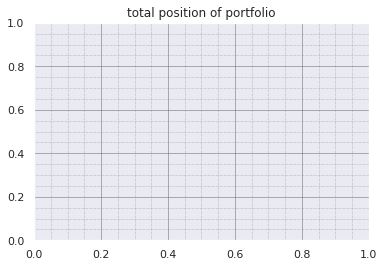

In [3]:
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()
plt.title("total position of portfolio")
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

In [4]:
alphaDB = StocksDb()
alphaDB.check_path()
print("\n", alphaDB.api_key_alpha)


api_key_alpha = alphaDB.api_key_alpha
root_path = alphaDB.path
print('root_path: ',root_path)

read_from_alphavantage = False
rename_column = True


usecols = ["timestamp", "adjusted_close"]
startd = "2020-01-01"
endd = "2020-12-31"
print('usecols:', usecols)
print('startd',startd)
print('endd',endd)


Directory  /home/pi/Documents/Python/data  already exists

 77K8XPSR3XWWZJ80
root_path:  /home/pi/Documents/Python
usecols: ['timestamp', 'adjusted_close']
startd 2020-01-01
endd 2020-12-31


In [5]:

symbol_list_full_refresh = [
    "SPY",
]
full_refresh_alphavantage = True

refresh_db(root_path, api_key_alpha, symbol_list_full_refresh)

('Directory ', '/home/pi/Documents/Python/data/SPY', ' already exists')
('_____________________________', 1)
SPY 1
<built-in method values of dict object at 0x7f65488c18>
('\n\t', '/home/pi/Documents/Python/data/SPY/daily_SPY.csv')
('Last Modified Time : ', '2020-12-27 23:03:08')
2020-12-27 23:03:08


In [6]:
# importcsv data from alpha_vantage from scratch (everything since year 2000) and store it in data folder
#create a data folder
#example: import csv data for Procter&Gamble and SPY (etf which mimicks S&P 500 index)
#you alway need to import and store a symbol once you can work with its csv.
#if you don't the ticker symbol use alpha vantage for google sheets functionality (extension)
#after importing extension and registered you api_key use formula =AVSearchEquitySymbol("<some symbol_description")
#example: =AVSearchEquitySymbol("bayer") this will output for example the ticker-symbol: BAYN.DEX

symbol_list = [
   "MSFT",
   "GOOG",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF", 
]



# persist_data(symbol_list_full_refresh, _dict, _path_list)
full_refresh = False

refresh_db(root_path, api_key_alpha, symbol_list, full_refresh)

# see if specific symbol exists in alpha-vantage db
"""

symbol = "4GP.FRK"
function="TIME_SERIES_DAILY_ADJUSTED"
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={api_key_alpha}&datatype=csv"
_df = pd.read_csv(url)
_df.head()¿

"""


symbol_list_short = [
    "PG",
    "AMZN",
    "SPY",
]
full_refresh = False

refresh_db(root_path, api_key_alpha, symbol_list_short, full_refresh)




processing symbol: MSFT
('last stock-date available from alpha_vantage:', '2020-12-24')
('Directory ', '/home/pi/Documents/Python/data/MSFT', ' already exists')
('number of entries we need to append to csv:', 16)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Python/data/MSFT', ' already exists')

processing symbol: GOOG
('last stock-date available from alpha_vantage:', '2020-12-24')
('Directory ', '/home/pi/Documents/Python/data/GOOG', ' already exists')
('number of entries we need to append to csv:', 16)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Python/data/GOOG', ' already exists')

processing symbol: DHR
('last stock-date available from alpha_vantage:', '2020-12-24')
('Directory ', '/home/pi/Documents/Python/data/DHR', ' already exists')
('number of entries we need to append to csv:', 16)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Pytho

In [7]:
#symbol_list = ["DHR", "GOOG"]

symbol_list = [
   "MSFT",
   "GOOG",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)

bool_list_all = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

bool_list_high_tech = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_industry = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_consumer = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

colors = [
    'magenta',
    'lime',
#   'tab:orange',
    'blue',
    'black',
    'slategrey',
    'tab:brown',
    'tab:olive',
    'darkviolet',
    'red',
    'turquoise',
    'forestgreen',
    'gold',
]

color_dict = dict(zip(symbol_list, colors))
print('\n')
print(color_dict)


{'ATR': '/home/pi/Documents/Python/data/ATR/daily_ATR.csv',
 'CL': '/home/pi/Documents/Python/data/CL/daily_CL.csv',
 'DHR': '/home/pi/Documents/Python/data/DHR/daily_DHR.csv',
 'EMR': '/home/pi/Documents/Python/data/EMR/daily_EMR.csv',
 'GOOG': '/home/pi/Documents/Python/data/GOOG/daily_GOOG.csv',
 'HEINY': '/home/pi/Documents/Python/data/HEINY/daily_HEINY.csv',
 'HXGBY': '/home/pi/Documents/Python/data/HXGBY/daily_HXGBY.csv',
 'LDSVF': '/home/pi/Documents/Python/data/LDSVF/daily_LDSVF.csv',
 'MCD': '/home/pi/Documents/Python/data/MCD/daily_MCD.csv',
 'MSFT': '/home/pi/Documents/Python/data/MSFT/daily_MSFT.csv',
 'NVS': '/home/pi/Documents/Python/data/NVS/daily_NVS.csv',
 'NVZMY': '/home/pi/Documents/Python/data/NVZMY/daily_NVZMY.csv'}


{'MSFT': 'magenta', 'GOOG': 'lime', 'DHR': 'blue', 'EMR': 'black', 'ATR': 'slategrey', 'HXGBY': 'tab:brown', 'NVS': 'tab:olive', 'NVZMY': 'darkviolet', 'CL': 'red', 'MCD': 'turquoise', 'HEINY': 'forestgreen', 'LDSVF': 'gold'}


In [8]:
### create dataframe with portfolio adjusted close
usecols = ["timestamp", "adjusted_close"]
pf = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf) 

                  MSFT     GOOG         DHR        EMR         ATR      HXGBY  \
2020-01-02  158.935751  1367.37  154.612761  75.189101  112.269514  57.098663   
2020-01-03  156.956723  1360.66  153.655839  74.160442  112.625048  55.552241   
2020-01-06  157.362424  1394.21  154.114364  74.771815  112.634924  55.368852   
2020-01-07  155.927628  1393.34  155.629491  74.956197  111.509068  55.443199   
2020-01-08  158.411309  1404.32  155.788978  75.218214  111.815222  55.304417   
...                ...      ...         ...        ...         ...        ...   
2020-12-18  218.590000  1731.01  226.110000  80.900000  134.100000  88.400000   
2020-12-21  222.590000  1739.37  226.160000  80.570000  134.890000  87.570000   
2020-12-22  223.940000  1723.50  222.930000  79.330000  134.500000  87.470000   
2020-12-23  221.020000  1732.38  220.390893  80.020000  134.530000  88.690000   
2020-12-24  222.750000  1738.85  221.490000  79.980000  135.700000  89.080000   

                  NVS      

In [9]:
#startd_new = string2date('2020-07-01')
#endd_new = string2date('2020-08-01')


startd = '2020-01-01'
included = bool_list_high_tech
#pf1 = pf.loc[startd:,:]
#pf1 = pf.loc[startd:,bool_list_consumer]
#pf1_vol = pf_vol.loc[startd:,:]
#pf1_vol = pf_vol.loc[startd:,bool_list_consumer]
pf1 = pf_filtered(pf,startd,included)
pf2 = pf_filtered(pf,startd,bool_list_industry)
pf3 = pf_filtered(pf,startd,bool_list_consumer)
pprint.pprint(pf1.head(3))
print('\n')


                  MSFT     GOOG
2020-01-02  158.935751  1367.37
2020-01-03  156.956723  1360.66
2020-01-06  157.362424  1394.21




In [10]:
startd

'2020-01-01'

In [11]:
endd

'2020-12-31'

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [12]:
#tesla['returns']
#(1+tesla['returns'])
#(1+tesla['returns']).cumprod()
df_returns = (pf/pf.shift(1))-1
pprint.pprint(df_returns['MSFT'])
print('\n')
(1+df_returns['MSFT']).cumprod()

2020-01-02         NaN
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015928
                ...   
2020-12-18   -0.003783
2020-12-21    0.018299
2020-12-22    0.006065
2020-12-23   -0.013039
2020-12-24    0.007827
Name: MSFT, Length: 249, dtype: float64




2020-01-02         NaN
2020-01-03    0.987548
2020-01-06    0.990101
2020-01-07    0.981073
2020-01-08    0.996700
                ...   
2020-12-18    1.375336
2020-12-21    1.400503
2020-12-22    1.408997
2020-12-23    1.390625
2020-12-24    1.401510
Name: MSFT, Length: 249, dtype: float64

In [13]:
#tesla['cumRet']=(1+tesla['returns']).cumprod()
#tesla.head(10)
#gm['cumRet']=(1+gm['returns']).cumprod()
#ford['cumRet']=(1+ford['returns']).cumprod()

df_cumReturns = initialize_df(symbol_list, startd, endd)
df_cumReturns = (1+df_returns).cumprod()
df_cumReturns.head()



,MSFT,GOOG,DHR,EMR,ATR,HXGBY,NVS,NVZMY,CL,MCD,HEINY,LDSVF
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.987548,0.995093,0.993811,0.986319,1.003167,0.972917,0.998315,0.982402,0.998532,0.996464,0.999440,1.000000
2020-01-06,0.990101,1.019629,0.996776,0.994450,1.003255,0.969705,1.005055,0.983835,1.005432,1.007670,1.021747,1.005652
2020-01-07,0.981073,1.018993,1.006576,0.996902,0.993227,0.971007,0.995050,0.979292,0.991632,1.009164,1.014187,1.023909
2020-01-08,0.996700,1.027023,1.007608,1.000387,0.995954,0.968576,0.995050,0.981993,1.016882,1.025499,1.017547,1.023909


<Figure size 432x288 with 0 Axes>

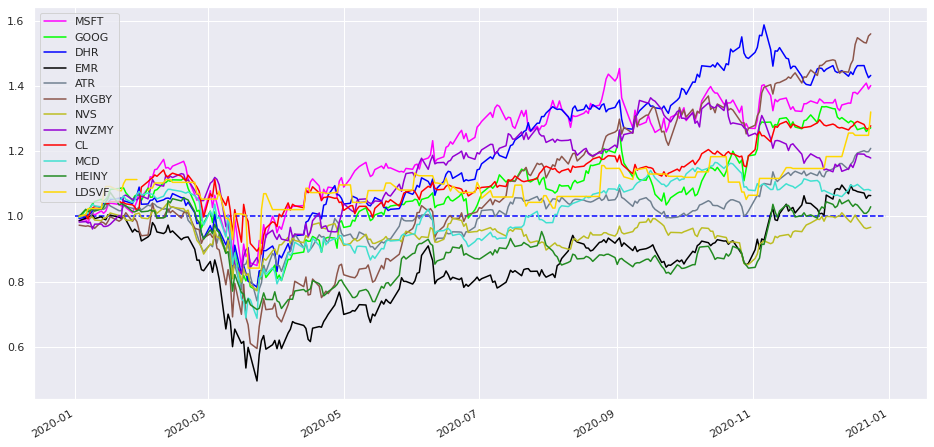

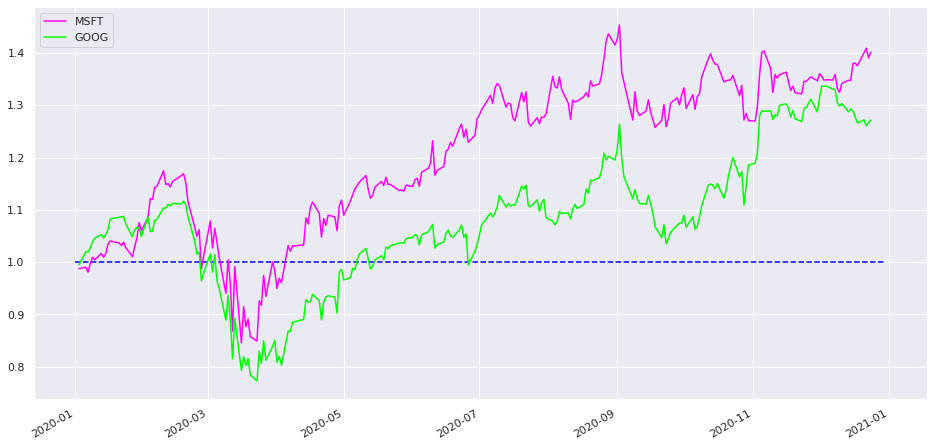

In [14]:
#tesla['cumRet'].plot(label='Tesla', figsize=(16,8))
#gm['cumRet'].plot(label='gm', figsize=(16,8))
#ford['cumRet'].plot(label='Ford', figsize=(16,8));
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()

color_list = [color_dict.get(x, _) for x in pf.columns]
df_cumReturns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in pf1.columns]
df_cumReturns[['MSFT','GOOG']].plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);



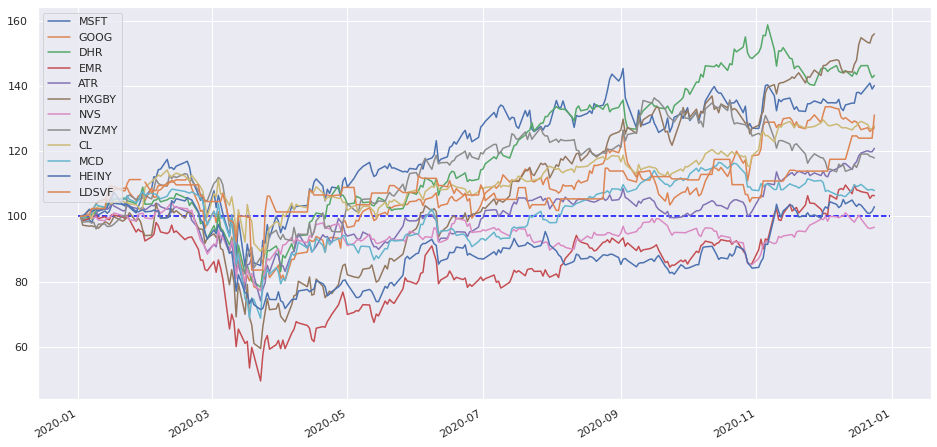

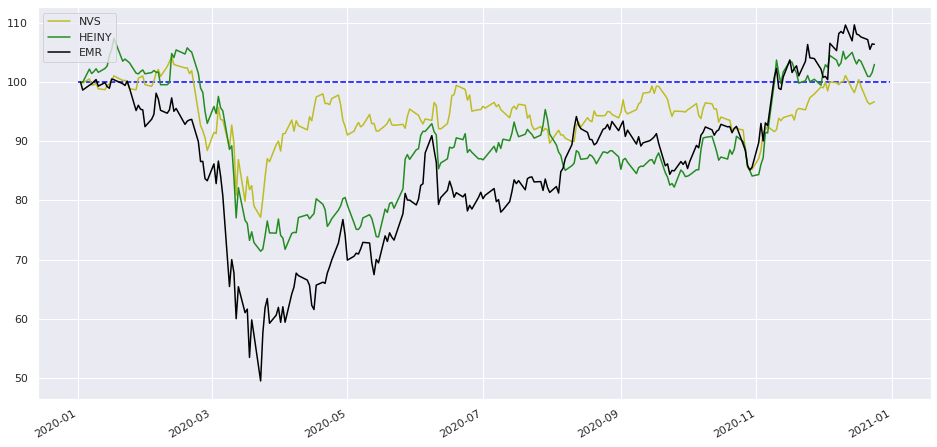

In [15]:
(pf / pf.iloc[0] * 100).plot(figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in ['NVS','HEINY','EMR']]
(pf[['NVS','HEINY','EMR']] / pf[['NVS','HEINY','EMR']].iloc[0] * 100).plot(color=color_list,figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

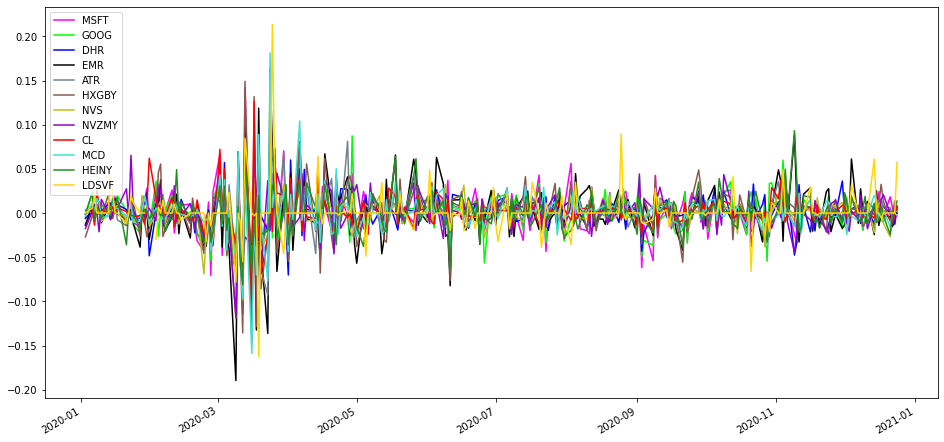

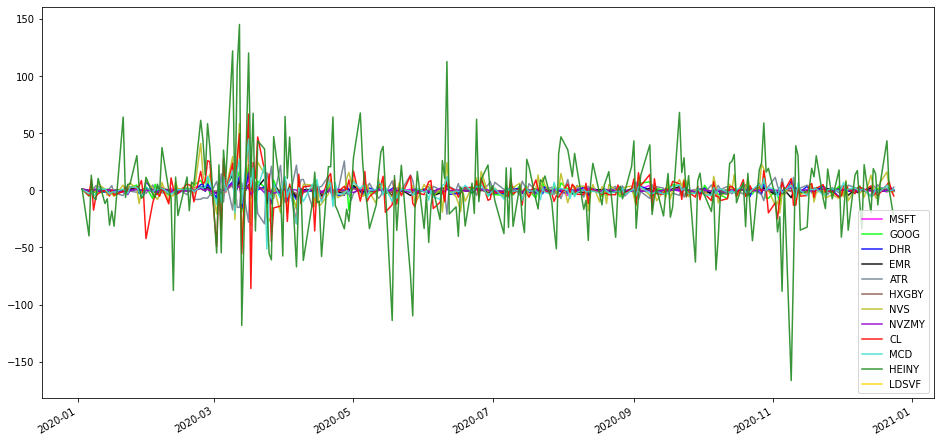

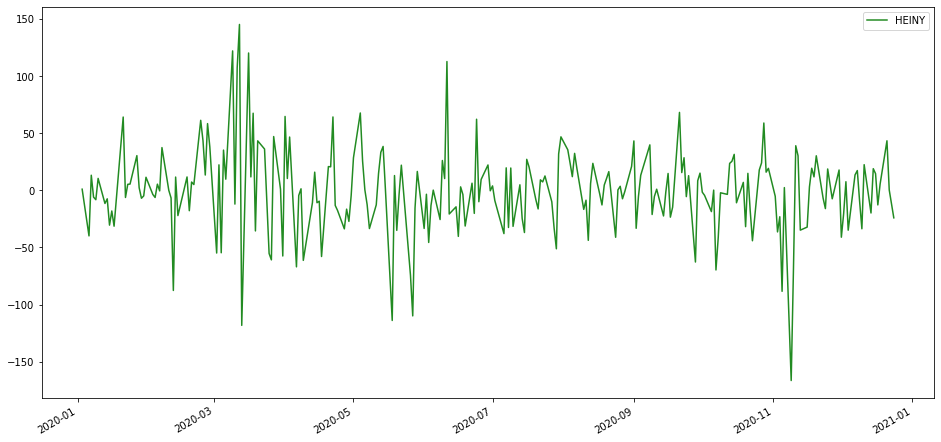

In [16]:
df_returns.head()
sns.reset_orig()

color_list = [color_dict.get(x, _) for x in df_returns.columns]

color_list

df_returns.plot(color=color_list, figsize=(16,8));
(df_returns / df_returns.iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);

(df_returns[['HEINY']] / df_returns[['HEINY']].iloc[1]).plot(color='forestgreen',figsize=(16,8));




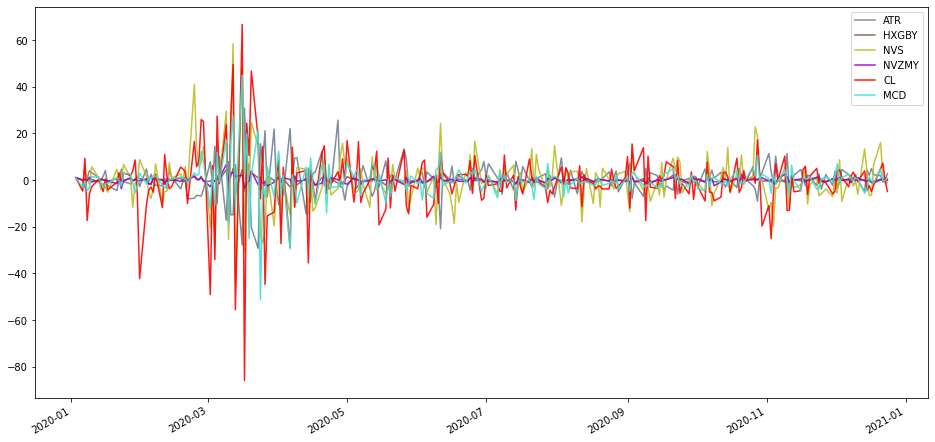

In [17]:
color_list = [color_dict.get(x, _) for x in ['ATR','HXGBY','NVS','NVZMY','CL','MCD']]
(df_returns[['ATR','HXGBY','NVS','NVZMY','CL','MCD']] / df_returns[['ATR','HXGBY','NVS','NVZMY','CL','MCD']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);


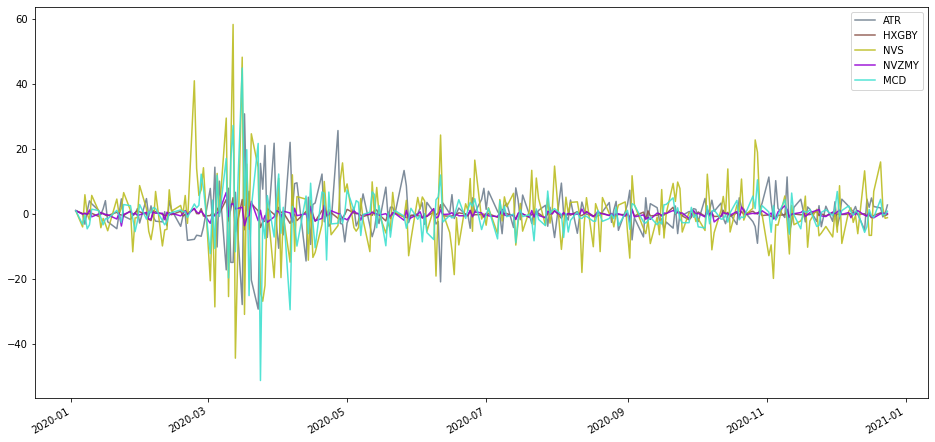

In [18]:
color_list = [color_dict.get(x, _) for x in ['ATR','HXGBY','NVS','NVZMY','MCD']]
(df_returns[['ATR','HXGBY','NVS','NVZMY','MCD']] / df_returns[['ATR','HXGBY','NVS','NVZMY','MCD']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

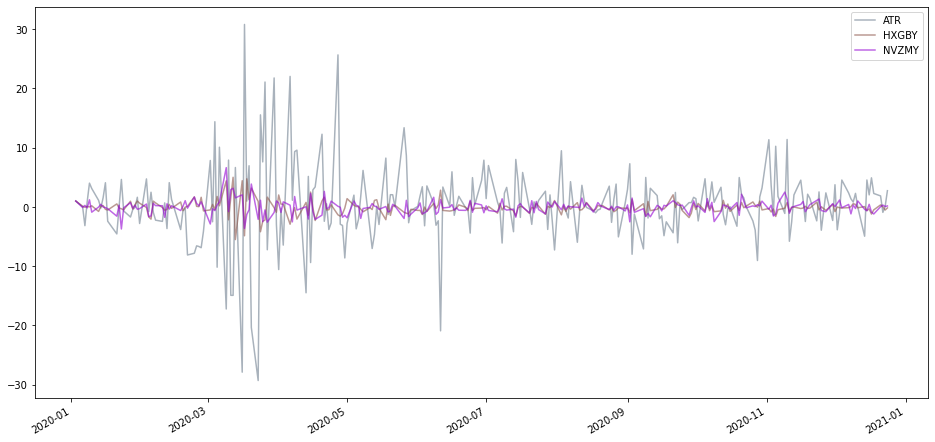

In [19]:
color_list = [color_dict.get(x, _) for x in ['ATR','HXGBY','NVZMY']]
(df_returns[['ATR','HXGBY','NVZMY']] / df_returns[['ATR','HXGBY','NVZMY']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.6);


# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!

In [20]:
#del [_df]
#gc.collect()
#_df=pd.DataFrame()
symbol_list = [
   "MSFT",
   "GOOG",    
   "AMZN",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

usecols = ["timestamp", "adjusted_close"]

path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)
df_aux1 = retrievePF(symbol_list, path_list, startd, endd,usecols)
df_aux1.head()
        

{'AMZN': '/home/pi/Documents/Python/data/AMZN/daily_AMZN.csv',
 'ATR': '/home/pi/Documents/Python/data/ATR/daily_ATR.csv',
 'CL': '/home/pi/Documents/Python/data/CL/daily_CL.csv',
 'DHR': '/home/pi/Documents/Python/data/DHR/daily_DHR.csv',
 'EMR': '/home/pi/Documents/Python/data/EMR/daily_EMR.csv',
 'GOOG': '/home/pi/Documents/Python/data/GOOG/daily_GOOG.csv',
 'HEINY': '/home/pi/Documents/Python/data/HEINY/daily_HEINY.csv',
 'HXGBY': '/home/pi/Documents/Python/data/HXGBY/daily_HXGBY.csv',
 'LDSVF': '/home/pi/Documents/Python/data/LDSVF/daily_LDSVF.csv',
 'MCD': '/home/pi/Documents/Python/data/MCD/daily_MCD.csv',
 'MSFT': '/home/pi/Documents/Python/data/MSFT/daily_MSFT.csv',
 'NVS': '/home/pi/Documents/Python/data/NVS/daily_NVS.csv',
 'NVZMY': '/home/pi/Documents/Python/data/NVZMY/daily_NVZMY.csv'}


,MSFT,GOOG,AMZN,DHR,EMR,ATR,HXGBY,NVS,NVZMY,CL,MCD,HEINY,LDSVF
2020-01-02,158.935751,1367.37,1898.01,154.612761,75.189101,112.269514,57.098663,91.616556,48.376768,66.543091,195.860712,52.979916,7531.186414
2020-01-03,156.956723,1360.66,1874.97,153.655839,74.160442,112.625048,55.552241,91.462173,47.525448,66.445405,195.168142,52.950247,7531.186414
2020-01-06,157.362424,1394.21,1902.88,154.114364,74.771815,112.634924,55.368852,92.079704,47.594741,66.904525,197.362906,54.132083,7573.754841
2020-01-07,155.927628,1393.34,1906.86,155.629491,74.956197,111.509068,55.443199,91.163056,47.374982,65.986285,197.655541,53.731545,7711.245965
2020-01-08,158.411309,1404.32,1891.97,155.788978,75.218214,111.815222,55.304417,91.163056,47.505649,67.666469,200.855019,53.909562,7711.245965


In [21]:
print('root_path:',root_path)

root_path: /home/pi/Documents/Python


#  Sharpe RATIO

In [22]:

symbol_list=['AAPL','AMZN','CSCO','MSFT']
startd='2012-01-01'
endd='2017-01-01'
for symbol in symbol_list:
    if symbol == 'AAPL':
        aapl = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)

    elif symbol == 'AMZN':
        amzn = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)
  
    elif symbol == 'CSCO':
        csco = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)
 
    elif symbol == 'MSFT':
        msft = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)


('Directory ', '/home/pi/Documents/Python/data/AAPL', ' already exists')
symbol: AAPL
('Directory ', '/home/pi/Documents/Python/data/AMZN', ' already exists')
symbol: AMZN
('Directory ', '/home/pi/Documents/Python/data/CSCO', ' already exists')
symbol: CSCO
('Directory ', '/home/pi/Documents/Python/data/MSFT', ' already exists')
symbol: MSFT


In [23]:
aapl.iloc[0]['adjusted_close']

12.6899

In [24]:
# cumulative returns:
for stock in (aapl, csco, amzn, msft):
    stock['cum_return'] = stock['adjusted_close'] / stock.iloc[0]['adjusted_close']

    

In [25]:
aapl.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return
timestamp,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,12.6899,10793600,0.0,1.0,1.000000
2012-01-04,410.0000,414.68,409.28,413.44,12.7581,9286500,0.0,1.0,1.005374
2012-01-05,414.9500,418.55,412.67,418.03,12.8997,9688200,0.0,1.0,1.016533
2012-01-06,419.7700,422.75,419.22,422.40,13.0346,11367600,0.0,1.0,1.027163
2012-01-09,425.5001,427.75,421.35,421.73,13.0139,14072300,0.0,1.0,1.025532


In [26]:
aapl.tail()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return
timestamp,,,,,,,,,
2016-12-23,115.59,116.5200,115.59,116.52,27.6328,14249484,0.0,1.0,2.177543
2016-12-27,116.52,117.8000,116.49,117.26,27.8083,18296855,0.0,1.0,2.191373
2016-12-28,117.52,118.0166,116.20,116.76,27.6898,20905892,0.0,1.0,2.182035
2016-12-29,116.45,117.1095,116.40,116.73,27.6826,15039519,0.0,1.0,2.181467
2016-12-30,116.65,117.2000,115.43,115.82,27.4668,30586265,0.0,1.0,2.164462


In [27]:
# a list of tuples (first element is the dataframe of the stock and second element is 0.3)
list(zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]));

In [28]:
aapl.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return
timestamp,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,12.6899,10793600,0.0,1.0,1.000000
2012-01-04,410.0000,414.68,409.28,413.44,12.7581,9286500,0.0,1.0,1.005374
2012-01-05,414.9500,418.55,412.67,418.03,12.8997,9688200,0.0,1.0,1.016533
2012-01-06,419.7700,422.75,419.22,422.40,13.0346,11367600,0.0,1.0,1.027163
2012-01-09,425.5001,427.75,421.35,421.73,13.0139,14072300,0.0,1.0,1.025532


In [29]:
# allocation to portfolio
# 30% aapl
# 20% amzn
# 40% csco
# 10% msft
aapl.head()
for stock, weight in zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]):
    stock['weight'] = stock['cum_return']*weight
    
    




In [30]:
aapl.head()
# 30% of my money is in apple so this is my cum return portfolio wise

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return,weight
timestamp,,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,12.6899,10793600,0.0,1.0,1.000000,0.300000
2012-01-04,410.0000,414.68,409.28,413.44,12.7581,9286500,0.0,1.0,1.005374,0.301612
2012-01-05,414.9500,418.55,412.67,418.03,12.8997,9688200,0.0,1.0,1.016533,0.304960
2012-01-06,419.7700,422.75,419.22,422.40,13.0346,11367600,0.0,1.0,1.027163,0.308149
2012-01-09,425.5001,427.75,421.35,421.73,13.0139,14072300,0.0,1.0,1.025532,0.307660


In [31]:
#investing 1Mio $ - calculate the position value of each stock according to its weight in the portfolio
for stock in (aapl, csco, amzn, msft):
    stock['pos_value'] = stock['weight']*100000
    
    

In [32]:
aapl.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return,weight,pos_value
timestamp,,,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,12.6899,10793600,0.0,1.0,1.000000,0.300000,30000.000000
2012-01-04,410.0000,414.68,409.28,413.44,12.7581,9286500,0.0,1.0,1.005374,0.301612,30161.230585
2012-01-05,414.9500,418.55,412.67,418.03,12.8997,9688200,0.0,1.0,1.016533,0.304960,30495.984996
2012-01-06,419.7700,422.75,419.22,422.40,13.0346,11367600,0.0,1.0,1.027163,0.308149,30814.900039
2012-01-09,425.5001,427.75,421.35,421.73,13.0139,14072300,0.0,1.0,1.025532,0.307660,30765.963483


In [33]:
all_pos_vals = [aapl['pos_value'], csco['pos_value'], amzn['pos_value'], msft['pos_value']]
#all_pos_vals
pf = pd.concat(all_pos_vals, axis = 1)
pf.columns = ['aapl', 'csco', 'amzn', 'msft']
pf.head()

,aapl,csco,amzn,msft
timestamp,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000
2012-01-04,30161.230585,20386.395541,39660.392113,10237.250140
2012-01-05,30495.984996,20311.201301,39682.734737,10341.864375
2012-01-06,30814.900039,20236.146052,40799.865944,10500.653839
2012-01-09,30765.963483,20364.990896,39894.989667,10364.281711


In [34]:
# total position
pf['total_pos']=pf.sum(axis=1)
pf.head()

,aapl,csco,amzn,msft,total_pos
timestamp,,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000
2012-01-04,30161.230585,20386.395541,39660.392113,10237.250140,100445.268379
2012-01-05,30495.984996,20311.201301,39682.734737,10341.864375,100831.785409
2012-01-06,30814.900039,20236.146052,40799.865944,10500.653839,102351.565874
2012-01-09,30765.963483,20364.990896,39894.989667,10364.281711,101390.225757


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


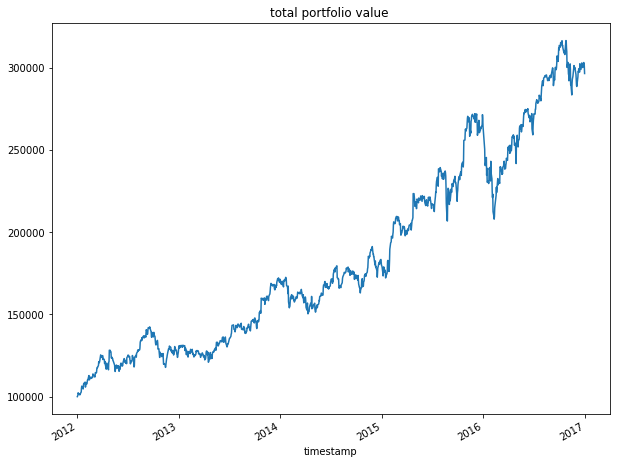

In [36]:
pf['total_pos'].plot(figsize=(10,8))
plt.title('total portfolio value ');

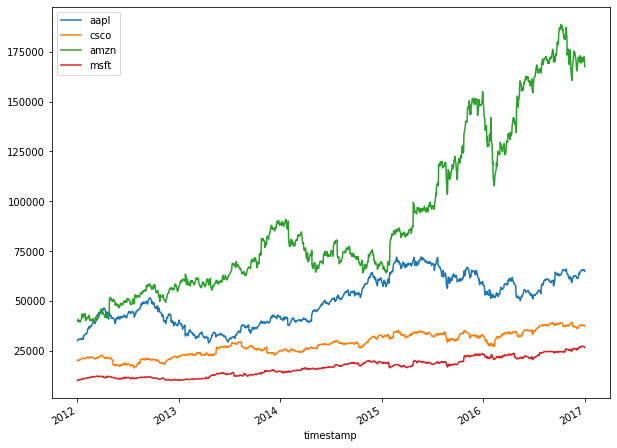

In [37]:
pf.drop('total_pos', axis = 1).plot(figsize=(10,8));

In [38]:
pf['daily_return']= pf['total_pos'].pct_change(1)
pf.head()

,aapl,csco,amzn,msft,total_pos,daily_return
timestamp,,,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000,NaN
2012-01-04,30161.230585,20386.395541,39660.392113,10237.250140,100445.268379,0.004453
2012-01-05,30495.984996,20311.201301,39682.734737,10341.864375,100831.785409,0.003848
2012-01-06,30814.900039,20236.146052,40799.865944,10500.653839,102351.565874,0.015072
2012-01-09,30765.963483,20364.990896,39894.989667,10364.281711,101390.225757,-0.009393


In [39]:
pf['daily_return'].std()

0.01286011479692313

In [40]:
pf['daily_return'].mean()

0.0009475220226821176

<AxesSubplot:ylabel='Density'>

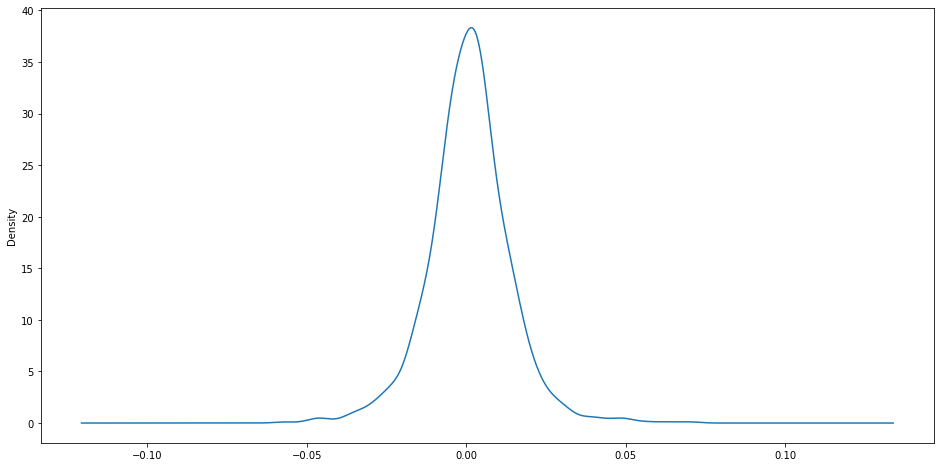

In [41]:
pf['daily_return'].plot(kind='kde', figsize=(16,8))

In [42]:
cum_return = 100 * ((pf['total_pos'][-1] - pf['total_pos'][0])/pf['total_pos'][0] )
cum_return

196.50873846561223

In [43]:
pf['total_pos'][-1]

296508.73846561223

In [44]:
#calculate sharpe ratio assume risk-free rate to be zero
sharp_ratio = pf['daily_return'].mean() / pf['daily_return'].std()
sharp_ratio

0.07367912632543674

In [45]:
# annualize thi sr 
# asr should be above 1 

sharp_ratio_annual = (252**0.5)*sharp_ratio
sharp_ratio_annual

1.1696198704417071

# portfolio optimization
# - monte carlo
# - mathematical optimization by minimizing the negative sharpe ratio

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
    

In [47]:
pf = pd.concat([aapl['adjusted_close'],csco['adjusted_close'],amzn['adjusted_close'], msft['adjusted_close']], axis=1)

pf.columns = ['aapl', 'csco', 'amzn', 'msft']

pf.head()

,aapl,csco,amzn,msft
timestamp,,,,
2012-01-03,12.6899,14.3894,179.03,21.844016
2012-01-04,12.7581,14.6674,177.51,22.362266
2012-01-05,12.8997,14.6133,177.61,22.590785
2012-01-06,13.0346,14.5593,182.61,22.937645
2012-01-09,13.0139,14.6520,178.56,22.639754


In [48]:
#calculate annual mean of returns as % 
pf.pct_change(1).mean()*252

aapl    0.188941
csco    0.151012
amzn    0.334731
msft    0.223819
dtype: float64

In [49]:
pf.pct_change(1).corr()

,aapl,csco,amzn,msft
aapl,1.000000,0.301991,0.235497,0.322867
csco,0.301991,1.000000,0.284513,0.421339
amzn,0.235497,0.284513,1.000000,0.352125
msft,0.322867,0.421339,0.352125,1.000000


In [50]:
# we use log returns for algorithms especially for normalizations
log_ret= np.log(pf/pf.shift(1))

log_ret.head()


,aapl,csco,amzn,msft
timestamp,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019136,-0.008526,0.023448
2012-01-05,0.011038,-0.003695,0.000563,0.010167
2012-01-06,0.010403,-0.003702,0.027763,0.015237
2012-01-09,-0.001589,0.006347,-0.022428,-0.013072


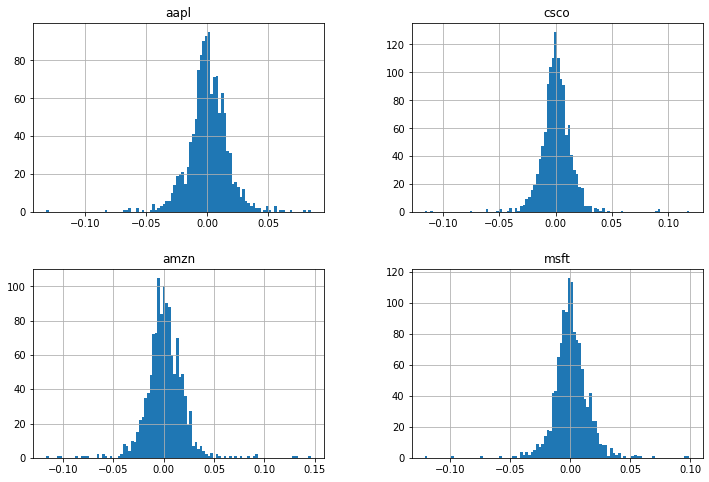

In [51]:
log_ret.hist(bins=100, figsize=(12,8));

In [52]:
log_ret.mean()

aapl    0.000614
csco    0.000497
amzn    0.001139
msft    0.000780
dtype: float64

In [53]:
log_ret.var()*252
#log_ret.std()*252**0.5

aapl    0.068326
csco    0.051381
amzn    0.094472
msft    0.054178
dtype: float64

In [54]:
log_ret.cov() * 252

,aapl,csco,amzn,msft
aapl,0.068326,0.017854,0.018987,0.019673
csco,0.017854,0.051381,0.019959,0.022281
amzn,0.018987,0.019959,0.094472,0.024922
msft,0.019673,0.022281,0.024922,0.054178


In [55]:
np.random.seed(101)
# to keep getting the same random weights

print(pf.columns)
weights = np.array(np.random.random(4))
print(weights)
# but they do not add up to 1

print('rebalance')
weights=weights/np.sum(weights)
print(weights)
np.sum(weights)


Index(['aapl', 'csco', 'amzn', 'msft'], dtype='object')
[0.51639863 0.57066759 0.02847423 0.17152166]
rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]


1.0000000000000002

In [56]:
print('expected portfolio return')
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print((log_ret.mean() * weights) * 252)
exp_ret
print(exp_ret)
print('\n expected volatility')
#denominator of sharp-ratio

exp_vol = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
print(exp_vol)

sr = exp_ret / exp_vol
print('\n sharpe ratio: ')
print(sr)


expected portfolio return
aapl    0.062110
csco    0.055552
amzn    0.006353
msft    0.026209
dtype: float64
0.15022432895157345

 expected volatility
0.18458980382112244

 sharpe ratio: 
0.8138278812905018


In [57]:
import numpy as np
np.random.seed(101)
num_pf = 5000
all_weights = np.zeros((num_pf, len(pf.columns)))
ret_arr = np.zeros(num_pf)
vol_arr = np.zeros(num_pf)
sharpe_arr = np.zeros(num_pf)

for ind in range(num_pf):
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    # expected return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    #expected volatility
    vol_arr[ind] = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
    #sharpe ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
    
print('done')





done


In [58]:
print(sharpe_arr.max())
sharpe_arr


1.1150455037141882


array([0.81382788, 0.99023394, 1.04982145, ..., 0.99932326, 0.85041346,
       0.99683678])

In [59]:
sharpe_arr.argmax()

2936

In [60]:
print(sharpe_arr[2936])
all_weights[2936,:]

1.1150455037141882


array([0.16917552, 0.04322089, 0.40661528, 0.38098831])

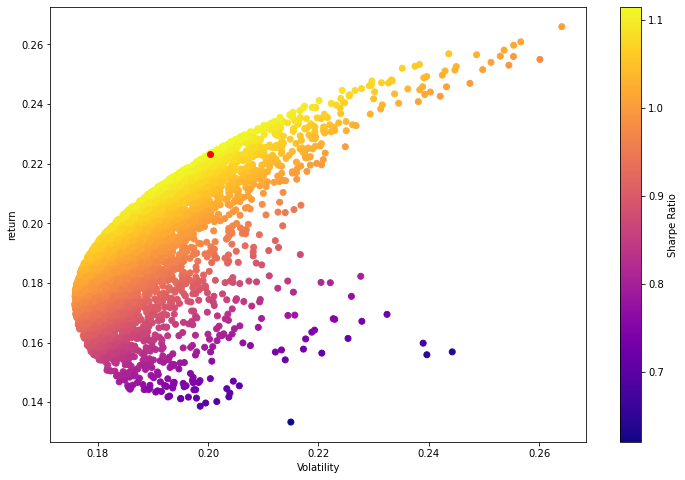

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
plt.scatter(max_sr_vol, max_sr_ret,  c='red')
           


# using ML approach

In [62]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)  * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr = ret / volo9
    return np.array([ret,vol,sr])

            

In [63]:
from scipy.optimize import minimize 
import numpy as np


In [64]:
#helper function
#minimize negative sharpe ratio which is the same as maximize sr
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [65]:
log_ret.head()

,aapl,csco,amzn,msft
timestamp,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019136,-0.008526,0.023448
2012-01-05,0.011038,-0.003695,0.000563,0.010167
2012-01-06,0.010403,-0.003702,0.027763,0.015237
2012-01-09,-0.001589,0.006347,-0.022428,-0.013072


In [66]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) - 1


In [67]:
cons = ({'type': 'eq', 'fun':check_sum})
#defines a constraint for minimize function - it says
# type will be equations and a function

In [68]:
bounds = ((0,1),(0,1), (0,1),(0,1))
#sum of weights is 1 
init_guess = [0.25,0.25,0.25,0.25]

In [69]:
#opt_results = minimize(neg_sharpe, )
help(minimize)


Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [70]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds,constraints=cons )
opt_results

     fun: -1.1152386398856429
     jac: array([-7.33584166e-05, -1.50620937e-04,  1.58846378e-05,  3.89218330e-05])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.16917671, 0.05710561, 0.39448159, 0.37923608])

In [71]:
if (np.sum(opt_results.x)) == 1:
    print("ok")

get_ret_vol_sr(opt_results.x)


ok


array([0.22120286, 0.19834576, 1.11523864])

In [72]:
# create an array of possible returns  y-values
frontier_y = np.linspace(0,0.3,100)
frontier_y

    

array([0.        , 0.0030303 , 0.00606061, 0.00909091, 0.01212121,
       0.01515152, 0.01818182, 0.02121212, 0.02424242, 0.02727273,
       0.03030303, 0.03333333, 0.03636364, 0.03939394, 0.04242424,
       0.04545455, 0.04848485, 0.05151515, 0.05454545, 0.05757576,
       0.06060606, 0.06363636, 0.06666667, 0.06969697, 0.07272727,
       0.07575758, 0.07878788, 0.08181818, 0.08484848, 0.08787879,
       0.09090909, 0.09393939, 0.0969697 , 0.1       , 0.1030303 ,
       0.10606061, 0.10909091, 0.11212121, 0.11515152, 0.11818182,
       0.12121212, 0.12424242, 0.12727273, 0.13030303, 0.13333333,
       0.13636364, 0.13939394, 0.14242424, 0.14545455, 0.14848485,
       0.15151515, 0.15454545, 0.15757576, 0.16060606, 0.16363636,
       0.16666667, 0.16969697, 0.17272727, 0.17575758, 0.17878788,
       0.18181818, 0.18484848, 0.18787879, 0.19090909, 0.19393939,
       0.1969697 , 0.2       , 0.2030303 , 0.20606061, 0.20909091,
       0.21212121, 0.21515152, 0.21818182, 0.22121212, 0.22424

In [73]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [74]:
frontier_volatility = []
#for a possible return what is the risk
#in order to get the return/volatility combinations on the efficient frontier 
#we add the second constraint
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},{'type':'eq', 'fun':lambda w: (get_ret_vol_sr(w)[0]-possible_return)})
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    frontier_volatility.append(result['fun'])
    
    
#frontier_volatility
    

In [75]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

max_sr_ret_calc = frontier_y[frontier_sr.argmax()]
max_sr_vol_calc = frontier_volatility[frontier_sr.argmax()]
print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])

1.1152385782790095
73
0.19835407913657963
0.22121212121212122


monte_carlo x-value-max:  0.20025360062844222
monte_carlo y-value-max: 0.22329187698332123
sharpe ratio x-value-max:  0.19835407913657963
sharpe ratio y-value-max: 0.22121212121212122


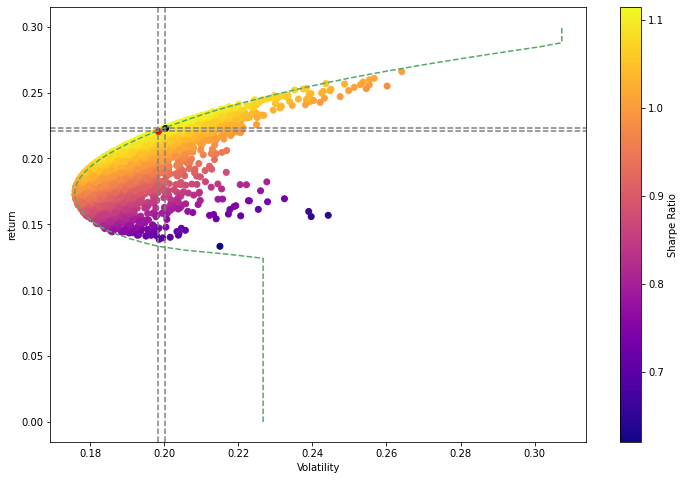

In [76]:
# calculated efficient frontier
plt.figure(figsize=(12,8))
plt.plot(frontier_volatility,frontier_y, 'g--');

#scatter-plot from monte carlo simulation
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
print('monte_carlo x-value-max: ', max_sr_vol)
print('monte_carlo y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='black');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');

max_sr_ret = max_sr_ret_calc
max_sr_vol = max_sr_vol_calc
print('sharpe ratio x-value-max: ', max_sr_vol)
print('sharpe ratio y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='red');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');
        

In [77]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])


1.1152385782790095
73
0.19835407913657963
0.22121212121212122
